In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import warnings 
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows',None )
pd.set_option('display.max_columns',None)

In [2]:
df = pd.read_csv(r'BYD_Sales.csv')

In [3]:
df

,Customer Name,Email,Location,Model,Range(km),Vehicle Type,Launch Date,Description,Cost,Price (NPR),Units Sold,Sale Date,Payment Method
0,Mrs. Rebecca Nguyen,danielthomas@vasquez.org,Kathmandu,BYD Atto 3,420,SUV,10/16/2022,"Luxury SUV, Advanced Tech, Spacious Interior",4585500,6780000,6,2023-11-05,Full Cash
1,David Morales,brandonmorales@watson-foster.com,Kathmandu,BYD Atto 3,420,SUV,10/16/2022,"Luxury SUV, Advanced Tech, Spacious Interior",4585500,6780000,5,2022-11-02,Full Cash
2,Christine Brown,jeffrey23@hotmail.com,Kathmandu,BYD Dolphin,340,NaN,9/11/2023,"Budget-Friendly Hatchback, Compact, Efficient",2780625,4115000,3,2023-11-22,NaN
3,Robert Gonzales,diane88@valenzuela-baker.com,Kathmandu,BYD Dolphin,340,Hatchback,9/11/2023,"Budget-Friendly Hatchback, Compact, Efficient",2780625,4115000,1,2023-12-04,NaN
4,Lawrence Nguyen,westvictor@norman.com,Kathmandu,BYD Atto 3,420,SUV,10/16/2022,"Luxury SUV, Advanced Tech, Spacious Interior",4585500,6780000,6,2024-01-26,EMI
5,Alexis Johnson,angelahoffman@park.org,Kathmandu,BYD Atto 3,420,SUV,10/16/2022,"Luxury SUV, Advanced Tech, Spacious Interior",4585500,6780000,6,2023-09-14,EMI
6,Randall Sandoval,garciamary@gmail.com,Kathmandu,BYD Dolphin,340,Hatchback,9/11/2023,"Budget-Friendly Hatchback, Compact, Efficient",2780625,4115000,0,2023-09-21,EMI
7,Sharon Ayers,keithcook@hotmail.com,Kathmandu,BYD Seal,520,Sedan,1/22/2024,"Luxury Sports Sedan, 390 kW Motor, Fast Accele...",13162500,19500000,3,2024-02-20,Full Cash
8,Denise Lyons,cherylriley@hotmail.com,Kathmandu,BYD Atto 3,420,NaN,10/16/2022,"Luxury SUV, Advanced Tech, Spacious Interior",4585500,6780000,1,2024-03-28,Full Cheque
9,Anthony Williams,jeffrey01@gmail.com,Kathmandu,BYD Dolphin,340,Hatchback,9/11/2023,"Budget-Friendly Hatchback, Compact, Efficient",2780625,4115000,2,2024-01-26,EMI


In [4]:
df.describe()

,Range(km),Cost,Price (NPR),Units Sold
count,2954.000000,2.954000e+03,2.954000e+03,2954.000000
mean,423.001354,4.410097e+06,6.525521e+06,2.064997
std,61.875097,1.842965e+06,2.730673e+06,1.631630
min,340.000000,2.780625e+06,4.115000e+06,0.000000
25%,400.000000,3.979750e+06,5.890000e+06,1.000000
50%,420.000000,4.585500e+06,6.780000e+06,2.000000
75%,420.000000,4.585500e+06,6.780000e+06,3.000000
max,522.000000,1.316250e+07,1.950000e+07,7.000000


In [5]:
df.isnull().sum()

Customer Name       0
Email               0
Location            0
Model               0
Range(km)           0
Vehicle Type       51
Launch Date         0
Description         0
Cost                0
Price (NPR)         0
Units Sold          0
Sale Date           0
Payment Method    407
dtype: int64

In [6]:
#df[df['Vehicle Type'].isnull()].head()

### Fill the null values in category column on the basis of the car model

In [7]:
cat = df.groupby('Model')['Vehicle Type'].value_counts().reset_index()

In [8]:
cat

,Model,Vehicle Type,count
0,BYD Atto 3,SUV,1452
1,BYD Dolphin,Hatchback,690
2,BYD M6,MPV,113
3,BYD Seal,Sedan,195
4,BYD e6,MPV,453


In [9]:
fill = {
'BYD e6':'MPV',
'BYD Atto 3':'SUV',
'BYD Dolphin':'Hatchback',
'BYD M6':'MPV',
'BYD Seal':'Sedan'
}
df['Vehicle Type'] = df['Vehicle Type'].fillna(df['Model'].map(fill))

### Fill the Payment Method based on the most repeated value (Mode)

In [10]:
df['Payment Method'].describe()

count     2547
unique       3
top        EMI
freq      1653
Name: Payment Method, dtype: object

In [11]:
df['Payment Method'] = df['Payment Method'].fillna('EMI')

In [12]:
df['Payment Method'].isnull().sum()

np.int64(0)

In [13]:
df.head()

,Customer Name,Email,Location,Model,Range(km),Vehicle Type,Launch Date,Description,Cost,Price (NPR),Units Sold,Sale Date,Payment Method
0,Mrs. Rebecca Nguyen,danielthomas@vasquez.org,Kathmandu,BYD Atto 3,420,SUV,10/16/2022,"Luxury SUV, Advanced Tech, Spacious Interior",4585500,6780000,6,2023-11-05,Full Cash
1,David Morales,brandonmorales@watson-foster.com,Kathmandu,BYD Atto 3,420,SUV,10/16/2022,"Luxury SUV, Advanced Tech, Spacious Interior",4585500,6780000,5,2022-11-02,Full Cash
2,Christine Brown,jeffrey23@hotmail.com,Kathmandu,BYD Dolphin,340,Hatchback,9/11/2023,"Budget-Friendly Hatchback, Compact, Efficient",2780625,4115000,3,2023-11-22,EMI
3,Robert Gonzales,diane88@valenzuela-baker.com,Kathmandu,BYD Dolphin,340,Hatchback,9/11/2023,"Budget-Friendly Hatchback, Compact, Efficient",2780625,4115000,1,2023-12-04,EMI
4,Lawrence Nguyen,westvictor@norman.com,Kathmandu,BYD Atto 3,420,SUV,10/16/2022,"Luxury SUV, Advanced Tech, Spacious Interior",4585500,6780000,6,2024-01-26,EMI


In [14]:
df['Sale Date'] = pd.to_datetime(df['Sale Date'])

In [15]:
df['Sale Month number'] = df['Sale Date'].dt.month

In [16]:
df['Sale Month Name'] = df['Sale Date'].dt.month_name()

In [17]:
df['Sale Year'] = df['Sale Date'].dt.year

In [18]:
df.head()

,Customer Name,Email,Location,Model,Range(km),Vehicle Type,Launch Date,Description,Cost,Price (NPR),Units Sold,Sale Date,Payment Method,Sale Month number,Sale Month Name,Sale Year
0,Mrs. Rebecca Nguyen,danielthomas@vasquez.org,Kathmandu,BYD Atto 3,420,SUV,10/16/2022,"Luxury SUV, Advanced Tech, Spacious Interior",4585500,6780000,6,2023-11-05,Full Cash,11,November,2023
1,David Morales,brandonmorales@watson-foster.com,Kathmandu,BYD Atto 3,420,SUV,10/16/2022,"Luxury SUV, Advanced Tech, Spacious Interior",4585500,6780000,5,2022-11-02,Full Cash,11,November,2022
2,Christine Brown,jeffrey23@hotmail.com,Kathmandu,BYD Dolphin,340,Hatchback,9/11/2023,"Budget-Friendly Hatchback, Compact, Efficient",2780625,4115000,3,2023-11-22,EMI,11,November,2023
3,Robert Gonzales,diane88@valenzuela-baker.com,Kathmandu,BYD Dolphin,340,Hatchback,9/11/2023,"Budget-Friendly Hatchback, Compact, Efficient",2780625,4115000,1,2023-12-04,EMI,12,December,2023
4,Lawrence Nguyen,westvictor@norman.com,Kathmandu,BYD Atto 3,420,SUV,10/16/2022,"Luxury SUV, Advanced Tech, Spacious Interior",4585500,6780000,6,2024-01-26,EMI,1,January,2024


### Define the correct month order

In [19]:
month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

# Convert "Sale Month Name" to categorical with ordered months
df["Sale Month Name"] = pd.Categorical(df["Sale Month Name"], categories=month_order, ordered=True)


### calculate the profit

In [20]:
df['Total Revenue'] = df['Price (NPR)']*df['Units Sold'] 

In [21]:
df['Profit']= df['Total Revenue']- df['Cost']

### Profit per Car Model – Identify which BYD models generate the highest profit.

In [22]:
df['Model'].value_counts()

Model
BYD Atto 3     1479
BYD Dolphin     700
BYD e6          463
BYD Seal        199
BYD M6          113
Name: count, dtype: int64

In [23]:
profit_model = df.groupby(['Model'])['Profit'].sum().reset_index()

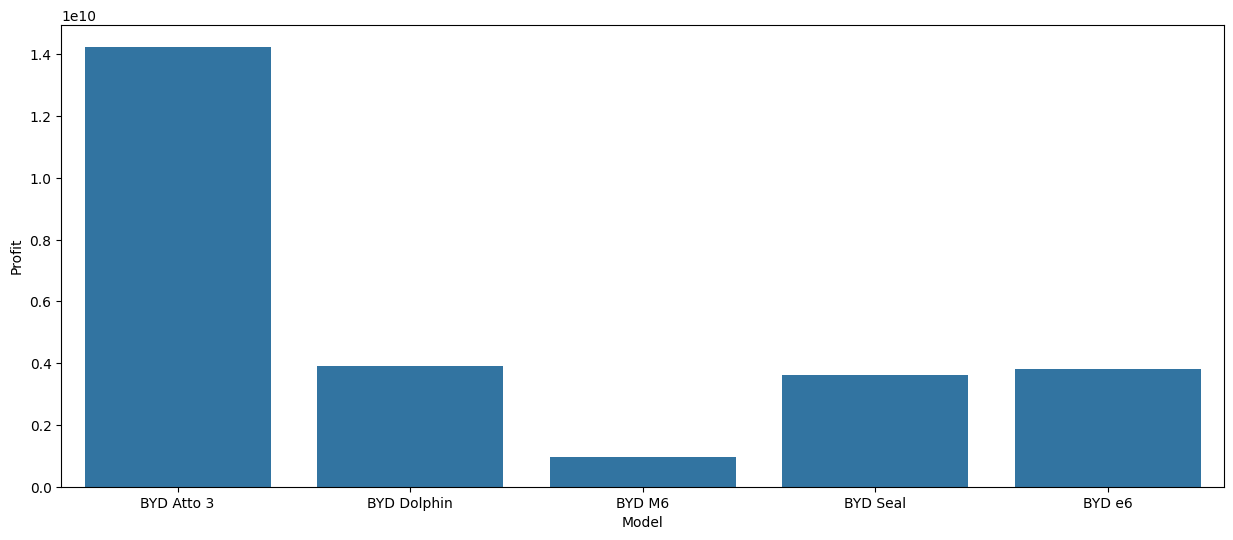

In [24]:
plt.figure(figsize=(15,6))
sns.barplot(data =profit_model, x = 'Model',y='Profit') 
plt.show()

### Profit by Location – Find out which regions bring the most profit.

In [25]:
profit_location = df.groupby(['Location'])['Profit'].sum().reset_index()

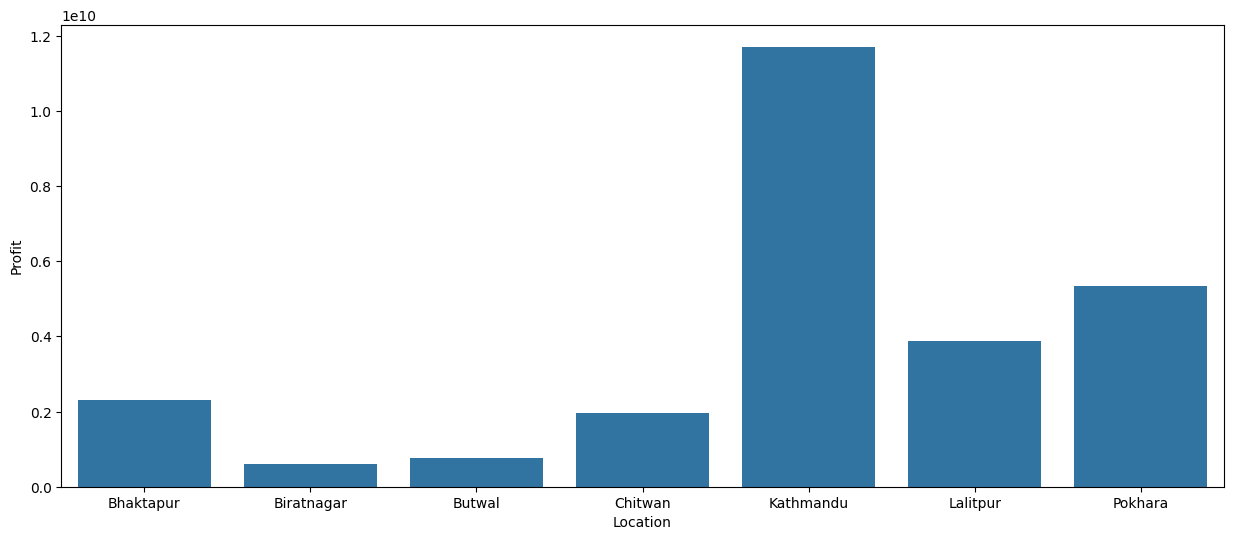

In [26]:
plt.figure(figsize=(15,6))
sns.barplot(data =profit_location, x = 'Location',y='Profit') 
plt.show()

In [43]:
units = df.groupby(['Vehicle Type'])['Units Sold'].sum().reset_index()

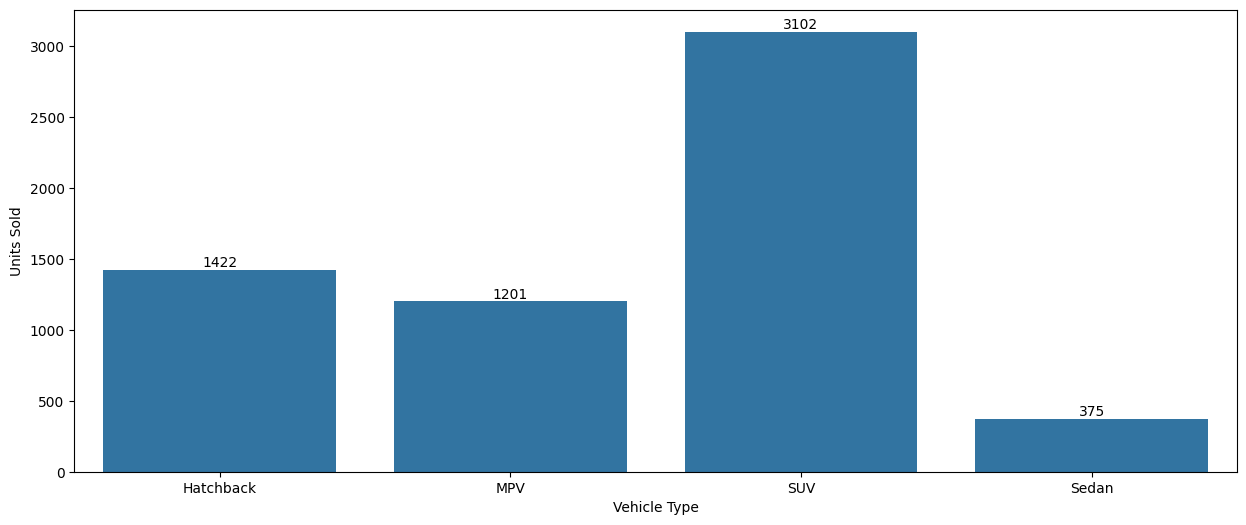

In [44]:
plt.figure(figsize=(15,6))
ax = sns.barplot(data = units, x = 'Vehicle Type',y='Units Sold') 
for container in ax.containers:
    ax.bar_label(container)
plt.show()

# KPIS



### 1. Total revenue

In [45]:
df['Total Revenue'] = df['Price (NPR)']*df['Units Sold'] 
print(f'The Totel Revenue = Rs.{df["Total Revenue"].sum()}')

The Totel Revenue = Rs.39579090000


### 2. Total Units Sold

In [47]:
total_units = df['Units Sold'].sum()
print(f'The Total Units Sold = {total_units} units.')

The Total Units Sold = 6100 units.


### 3. Best Selling Car Model

In [48]:
best_selling = df.groupby('Model')['Units Sold'].sum().reset_index()
print(f'Best Selling Car Model is "{best_selling.iloc[0,0]}"')

Best Selling Car Model is "BYD Atto 3"


### 4. Sales by location

In [50]:
# Heat map 
location = df.groupby('Location')['Total Revenue'].sum().sort_values(ascending= False).reset_index()
for index, row in location.iterrows():
    print(f'Location: {row["Location"]}, Total Revenue: {row["Total Revenue"]}')
    

Location: Kathmandu, Total Revenue: 15496360000
Location: Pokhara, Total Revenue: 8099720000
Location: Lalitpur, Total Revenue: 5953540000
Location: Bhaktapur, Total Revenue: 3963000000
Location: Chitwan, Total Revenue: 3155200000
Location: Butwal, Total Revenue: 1604815000
Location: Biratnagar, Total Revenue: 1306455000


### 5. Monthly Sales Trend

In [51]:
sales =  df.groupby(['Sale Year','Sale Month Name'])['Total Revenue'].sum().reset_index()
sales_pivot = sales.pivot(index='Sale Month Name', columns='Sale Year', values='Total Revenue')
sales_pivot

Sale Year,2021,2022,2023,2024
Sale Month Name,,,,
January,0,324500000,1063940000,6095370000
February,0,188800000,976320000,1262425000
March,424800000,141600000,1023520000,1108115000
April,601800000,147500000,710140000,1144420000
May,595900000,171100000,1072740000,1241005000
June,684400000,88500000,814220000,1017000000
July,548700000,141600000,854900000,908300000
August,141600000,47200000,949200000,642885000
September,342200000,165200000,5819360000,105920000


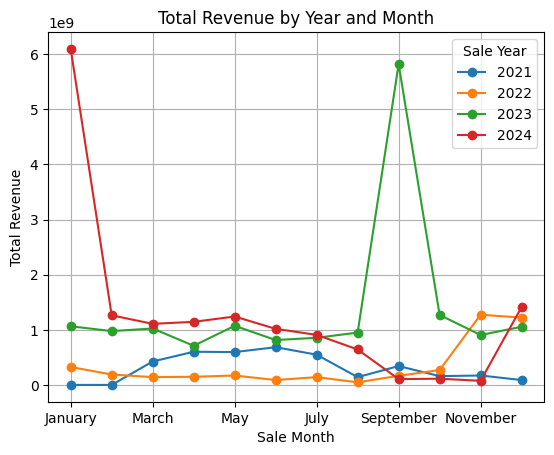

In [52]:
# Set the order for months to ensure all months are shown, even if some have missing data
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

sales_pivot.plot(kind='line', marker='o')

# Add plot details
plt.title('Total Revenue by Year and Month')
plt.xlabel('Sale Month')
plt.ylabel('Total Revenue')
plt.grid(True)

# Show the plot
plt.show()

In [53]:
pivot_table = df.pivot_table(values='Units Sold', index='Location', columns='Model', aggfunc='count', fill_value=0)
pivot_table

Model,BYD Atto 3,BYD Dolphin,BYD M6,BYD Seal,BYD e6
Location,,,,,
Bhaktapur,194,82,15,22,64
Biratnagar,83,28,3,15,20
Butwal,102,41,7,12,34
Chitwan,147,59,10,14,39
Kathmandu,423,216,42,53,132
Lalitpur,230,124,17,37,71
Pokhara,300,150,19,46,103


In [54]:
df.head()

,Customer Name,Email,Location,Model,Range(km),Vehicle Type,Launch Date,Description,Cost,Price (NPR),Units Sold,Sale Date,Payment Method,Sale Month number,Sale Month Name,Sale Year,Total Revenue,Profit
0,Mrs. Rebecca Nguyen,danielthomas@vasquez.org,Kathmandu,BYD Atto 3,420,SUV,10/16/2022,"Luxury SUV, Advanced Tech, Spacious Interior",4585500,6780000,6,2023-11-05,Full Cash,11,November,2023,40680000,36094500
1,David Morales,brandonmorales@watson-foster.com,Kathmandu,BYD Atto 3,420,SUV,10/16/2022,"Luxury SUV, Advanced Tech, Spacious Interior",4585500,6780000,5,2022-11-02,Full Cash,11,November,2022,33900000,29314500
2,Christine Brown,jeffrey23@hotmail.com,Kathmandu,BYD Dolphin,340,Hatchback,9/11/2023,"Budget-Friendly Hatchback, Compact, Efficient",2780625,4115000,3,2023-11-22,EMI,11,November,2023,12345000,9564375
3,Robert Gonzales,diane88@valenzuela-baker.com,Kathmandu,BYD Dolphin,340,Hatchback,9/11/2023,"Budget-Friendly Hatchback, Compact, Efficient",2780625,4115000,1,2023-12-04,EMI,12,December,2023,4115000,1334375
4,Lawrence Nguyen,westvictor@norman.com,Kathmandu,BYD Atto 3,420,SUV,10/16/2022,"Luxury SUV, Advanced Tech, Spacious Interior",4585500,6780000,6,2024-01-26,EMI,1,January,2024,40680000,36094500


In [55]:
sales2 =  df.groupby(['Sale Year','Sale Month Name'])['Price (NPR)'].sum().reset_index()

<Axes: xlabel='Sale Month Name', ylabel='Price (NPR)'>

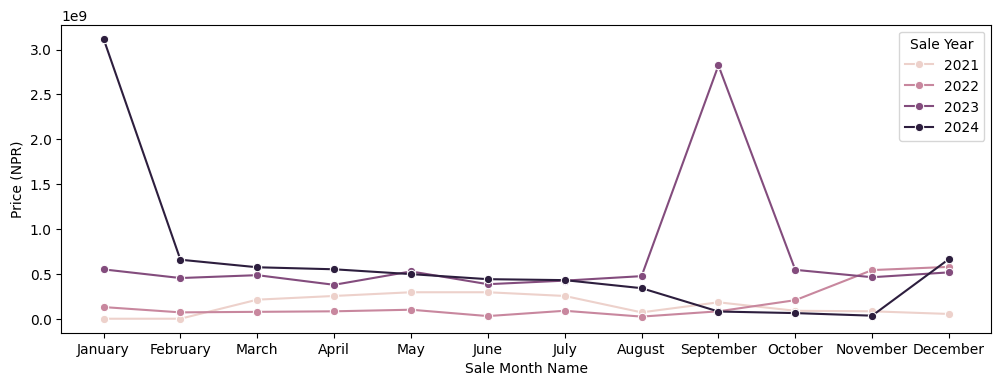

In [56]:
plt.figure(figsize=(12,4))
sns.lineplot(data = sales2 ,x='Sale Month Name' ,y= 'Price (NPR)', hue= 'Sale Year', marker ='o')

In [57]:
df.head()

,Customer Name,Email,Location,Model,Range(km),Vehicle Type,Launch Date,Description,Cost,Price (NPR),Units Sold,Sale Date,Payment Method,Sale Month number,Sale Month Name,Sale Year,Total Revenue,Profit
0,Mrs. Rebecca Nguyen,danielthomas@vasquez.org,Kathmandu,BYD Atto 3,420,SUV,10/16/2022,"Luxury SUV, Advanced Tech, Spacious Interior",4585500,6780000,6,2023-11-05,Full Cash,11,November,2023,40680000,36094500
1,David Morales,brandonmorales@watson-foster.com,Kathmandu,BYD Atto 3,420,SUV,10/16/2022,"Luxury SUV, Advanced Tech, Spacious Interior",4585500,6780000,5,2022-11-02,Full Cash,11,November,2022,33900000,29314500
2,Christine Brown,jeffrey23@hotmail.com,Kathmandu,BYD Dolphin,340,Hatchback,9/11/2023,"Budget-Friendly Hatchback, Compact, Efficient",2780625,4115000,3,2023-11-22,EMI,11,November,2023,12345000,9564375
3,Robert Gonzales,diane88@valenzuela-baker.com,Kathmandu,BYD Dolphin,340,Hatchback,9/11/2023,"Budget-Friendly Hatchback, Compact, Efficient",2780625,4115000,1,2023-12-04,EMI,12,December,2023,4115000,1334375
4,Lawrence Nguyen,westvictor@norman.com,Kathmandu,BYD Atto 3,420,SUV,10/16/2022,"Luxury SUV, Advanced Tech, Spacious Interior",4585500,6780000,6,2024-01-26,EMI,1,January,2024,40680000,36094500


In [58]:
df.to_csv('BYD_Sales_Dataset.csv', index = False)